In [11]:
import datetime as dt
import talib as ta
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr

In [16]:
# get data from yahoo
import yfinance as yf
data = yf.download('MSFT', start = '2012-01-01', end='2017-01-01')

[*********************100%%**********************]  1 of 1 completed


In [17]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.238762,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.738581,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,21.960724,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.301876,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.008327,59706800
...,...,...,...,...,...,...
2016-12-23,63.450001,63.540001,62.799999,63.240002,57.634758,12403800
2016-12-27,63.209999,64.070000,63.209999,63.279999,57.671211,11763200
2016-12-28,63.400002,63.400002,62.830002,62.990002,57.406921,14653300


In [28]:
data['SMA_100'] = ta.SMA(data['Close'], 100)
data['EMA_100'] = ta.EMA(data['Close'], 100)
data['RSI'] = ta.RSI(data['Close'], 14)

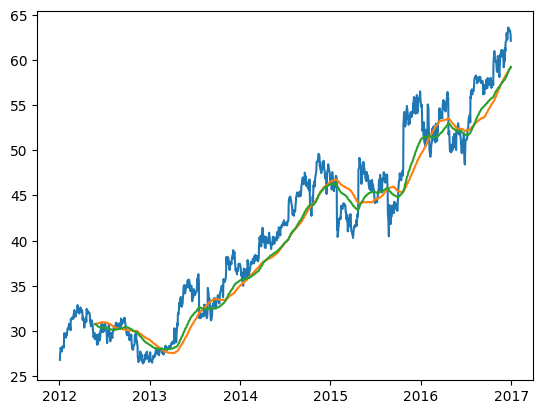

In [27]:
plt.plot(data['Close'])
plt.plot(data['SMA_100'])
plt.plot(data['EMA_100'])

In [38]:
ta.get_function_groups()

{'Cycle Indicators': ['HT_DCPERIOD',
  'HT_DCPHASE',
  'HT_PHASOR',
  'HT_SINE',
  'HT_TRENDMODE'],
 'Math Operators': ['ADD',
  'DIV',
  'MAX',
  'MAXINDEX',
  'MIN',
  'MININDEX',
  'MINMAX',
  'MINMAXINDEX',
  'MULT',
  'SUB',
  'SUM'],
 'Math Transform': ['ACOS',
  'ASIN',
  'ATAN',
  'CEIL',
  'COS',
  'COSH',
  'EXP',
  'FLOOR',
  'LN',
  'LOG10',
  'SIN',
  'SINH',
  'SQRT',
  'TAN',
  'TANH'],
 'Momentum Indicators': ['ADX',
  'ADXR',
  'APO',
  'AROON',
  'AROONOSC',
  'BOP',
  'CCI',
  'CMO',
  'DX',
  'MACD',
  'MACDEXT',
  'MACDFIX',
  'MFI',
  'MINUS_DI',
  'MINUS_DM',
  'MOM',
  'PLUS_DI',
  'PLUS_DM',
  'PPO',
  'ROC',
  'ROCP',
  'ROCR',
  'ROCR100',
  'RSI',
  'STOCH',
  'STOCHF',
  'STOCHRSI',
  'TRIX',
  'ULTOSC',
  'WILLR'],
 'Overlap Studies': ['BBANDS',
  'DEMA',
  'EMA',
  'HT_TRENDLINE',
  'KAMA',
  'MA',
  'MAMA',
  'MAVP',
  'MIDPOINT',
  'MIDPRICE',
  'SAR',
  'SAREXT',
  'SMA',
  'T3',
  'TEMA',
  'TRIMA',
  'WMA'],
 'Pattern Recognition': ['CDL2CROWS',
  'C

In [40]:
?ta.RSI

In [41]:
?ta.CDLENGULFING

In [42]:
?

Object `ta.ROIC` not found.


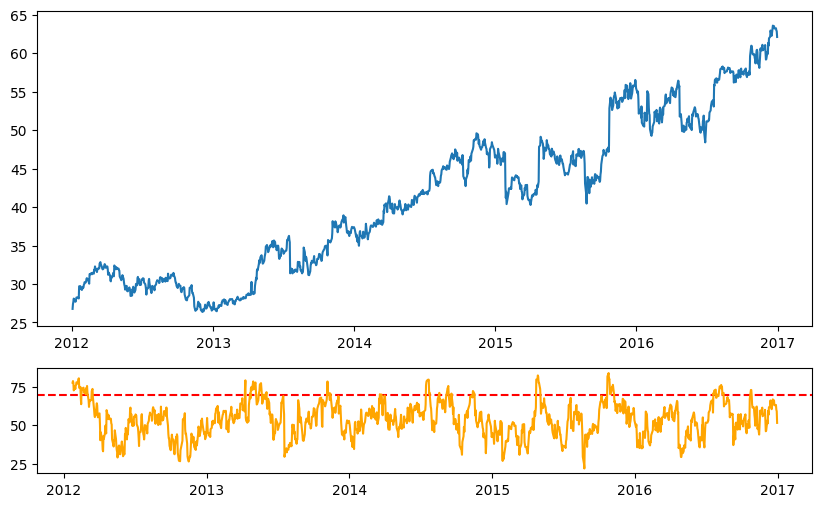

In [35]:
fig, axs = plt.subplots(2, 1, gridspec_kw = {"height_ratios": [3, 1]}, figsize=(10, 6))

axs[0].plot(data['Close'])
axs[1].axhline(y=70, color='r',linestyle='--')
axs[1].plot(data['RSI'], color='orange')

<BarContainer object of 1258 artists>

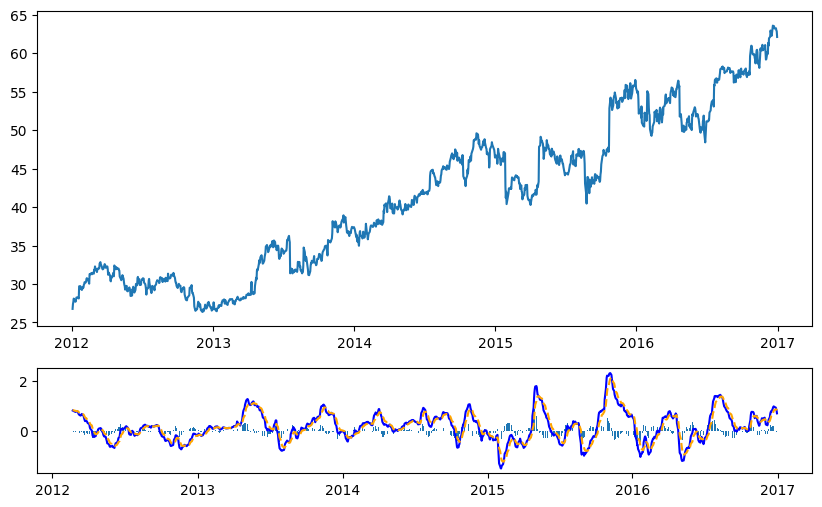

In [37]:
macd, macd_signal, macd_hist = ta.MACD(data['Close'])

fig, axs = plt.subplots(2, 1, gridspec_kw = {"height_ratios": [3, 1]}, figsize=(10, 6))

axs[0].plot(data['Close'])
axs[1].plot(macd, 'b-')
axs[1].plot(macd_signal, '--', color='orange')
axs[1].bar(macd_hist.index, macd_hist)